In [58]:
# %matplotlib inline
# 
import sys, os
import glob
import json
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

json_dir = '/Users/coriny/cgps-gits/paarsnp-benchmark-runner/test/90370/Klemm_et_al_2018'

matches = defaultdict(list)

for json_file in glob.glob(json_dir + '/*paarsnp.jsn'):

    with open(json_file, 'r') as jf:
        paarsnp = json.load(jf)

    assembly_name = os.path.basename(json_file).replace('_paarsnp.jsn', '')

    for match in paarsnp['matches']:
        pid = match['percentIdentity']
        coverage = ((match['library']['stop'] - match['library']['start'] + 1) / match['library']['length']) * 100
        name = match['library']['id']
        matches[name].append((assembly_name, pid, coverage))

matches.keys()

dict_keys(['gyrA', 'catA1', 'dfrA7', 'sul1', 'sul2', 'TEM-1', 'blaCTX-M-15_23', 'qnr-S', 'parE', 'parC'])

In [59]:
sul2_df = pd.DataFrame(matches['sul2'], columns=['ASSEMBLY_NAME', 'PID', 'COVERAGE %'])
sul2_df.describe()

,PID,COVERAGE %
count,130.000000,130.000000
mean,99.868077,98.043929
std,0.177406,4.442543
min,99.430000,82.107843
25%,99.740000,97.549020
50%,100.000000,100.000000
75%,100.000000,100.000000
max,100.000000,100.000000


In [60]:
counts = sul2_df[['PID']].groupby('PID').size()
# plt.savefig('test.png')
counts

PID
99.43      5
99.63     25
99.74      5
99.75     15
100.00    80
dtype: int64

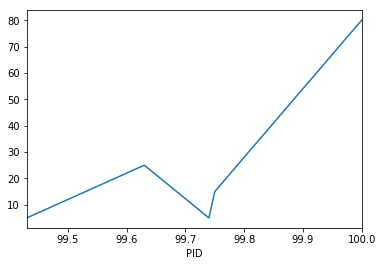

In [61]:

plt.close('all')
plt.show()
counts.plot()

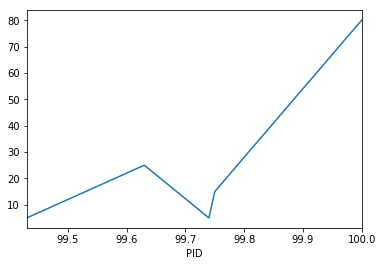